## 패키지 Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import os
import cv2
import PIL
import shutil
import keras
from PIL import Image

import tensorflow as tf
# 이미지 데이터 증강
import albumentations as A

# from Geometry import *
# from Blur import *
# from Contrast import *
# from Geometry import *
# from Color import *
# from ImgCorruptlike import *


In [ ]:
pip install albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 파일 압축 풀기
# %cd 압축을 풀 경로
# !unzip -qq "압축파일 Path"

%cd /content/drive/MyDrive/6dogma_sy/res
!unzip -qq "/content/drive/MyDrive/6dogma_sy/res/resized_aug.zip"

/content/drive/MyDrive/6dogma_sy/res


## 이미지 데이터 불러오기

In [ ]:
# 기본 경로
base_dir = '/content/drive/MyDrive/6dogma_sy/res/resized_aug/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 Good/Bad 이미지 경로
train_G_dir = os.path.join(train_dir, 'Good')
train_B_dir = os.path.join(train_dir, 'bad')
print(train_G_dir, train_B_dir)

# 테스트용 Good/Bad 이미지 경로
test_G_dir = os.path.join(test_dir, 'Good')
test_B_dir = os.path.join(test_dir, 'bad')
print(test_G_dir, test_B_dir)

/content/drive/MyDrive/6dogma_sy/res/resized_aug/train/Good /content/drive/MyDrive/6dogma_sy/res/resized_aug/train/bad
/content/drive/MyDrive/6dogma_sy/res/resized_aug/test/Good /content/drive/MyDrive/6dogma_sy/res/resized_aug/test/bad


In [ ]:
# 훈련용 이미지 파일 이름 조회

train_G_fnames = os.listdir(train_G_dir)
train_B_fnames = os.listdir(train_B_dir)
print(train_G_fnames)
print(train_B_fnames)

['KEMP_IMG_DATA_1106.png', 'KEMP_IMG_DATA_1107.png', 'KEMP_IMG_DATA_1108.png', 'KEMP_IMG_DATA_111.png', 'KEMP_IMG_DATA_1109.png', 'KEMP_IMG_DATA_1110.png', 'KEMP_IMG_DATA_1111.png', 'KEMP_IMG_DATA_1112.png', 'KEMP_IMG_DATA_1113.png', 'KEMP_IMG_DATA_1115.png', 'KEMP_IMG_DATA_1118.png', 'KEMP_IMG_DATA_1117.png', 'KEMP_IMG_DATA_1119.png', 'KEMP_IMG_DATA_112.png', 'KEMP_IMG_DATA_1122.png', 'KEMP_IMG_DATA_1124.png', 'KEMP_IMG_DATA_1126.png', 'KEMP_IMG_DATA_1125.png', 'KEMP_IMG_DATA_1127.png', 'KEMP_IMG_DATA_1128.png', 'KEMP_IMG_DATA_1129.png', 'KEMP_IMG_DATA_113.png', 'KEMP_IMG_DATA_1133.png', 'KEMP_IMG_DATA_1134.png', 'KEMP_IMG_DATA_1135.png', 'KEMP_IMG_DATA_1136.png', 'KEMP_IMG_DATA_1139.png', 'KEMP_IMG_DATA_1138.png', 'KEMP_IMG_DATA_114.png', 'KEMP_IMG_DATA_1140.png', 'KEMP_IMG_DATA_1141.png', 'KEMP_IMG_DATA_1144.png', 'KEMP_IMG_DATA_1145.png', 'KEMP_IMG_DATA_1146.png', 'KEMP_IMG_DATA_1147.png', 'KEMP_IMG_DATA_1149.png', 'KEMP_IMG_DATA_1148.png', 'KEMP_IMG_DATA_1150.png', 'KEMP_IMG_DATA_

In [ ]:
# 테스트용 이미지 파일 이름 조회

test_G_fnames = os.listdir(test_G_dir)
test_B_fnames = os.listdir(test_B_dir)
print(test_G_fnames)
print(test_B_fnames)

['KEMP_IMG_DATA_1008.png', 'KEMP_IMG_DATA_10.png', 'KEMP_IMG_DATA_1011.png', 'KEMP_IMG_DATA_1016.png', 'KEMP_IMG_DATA_1014.png', 'KEMP_IMG_DATA_1019.png', 'KEMP_IMG_DATA_1048.png', 'KEMP_IMG_DATA_1040.png', 'KEMP_IMG_DATA_1052.png', 'KEMP_IMG_DATA_1057.png', 'KEMP_IMG_DATA_1060.png', 'KEMP_IMG_DATA_1062.png', 'KEMP_IMG_DATA_1065.png', 'KEMP_IMG_DATA_1068.png', 'KEMP_IMG_DATA_1091.png', 'KEMP_IMG_DATA_1095.png', 'KEMP_IMG_DATA_11.png', 'KEMP_IMG_DATA_1096.png', 'KEMP_IMG_DATA_1114.png', 'KEMP_IMG_DATA_1120.png', 'KEMP_IMG_DATA_1116.png', 'KEMP_IMG_DATA_1121.png', 'KEMP_IMG_DATA_1130.png', 'KEMP_IMG_DATA_1123.png', 'KEMP_IMG_DATA_1131.png', 'KEMP_IMG_DATA_1137.png', 'KEMP_IMG_DATA_1132.png', 'KEMP_IMG_DATA_1142.png', 'KEMP_IMG_DATA_1143.png', 'KEMP_IMG_DATA_115.png', 'KEMP_IMG_DATA_1161.png', 'KEMP_IMG_DATA_1162.png', 'KEMP_IMG_DATA_1164.png', 'KEMP_IMG_DATA_1170.png', 'KEMP_IMG_DATA_1171.png', 'KEMP_IMG_DATA_1178.png', 'KEMP_IMG_DATA_1181.png', 'KEMP_IMG_DATA_1183.png', 'KEMP_IMG_DATA_1

In [ ]:
# 각 디렉토리에 저장되어 있는 이미지 파일 수 확인

print('Total training G images :', len(os.listdir(train_G_dir)))
print('Total training B images :', len(os.listdir(train_B_dir)))

print('Total test G images :', len(os.listdir(test_G_dir)))
print('Total test B images :', len(os.listdir(test_B_dir)))

Total training G images : 1102
Total training B images : 649
Total test G images : 276
Total test B images : 165


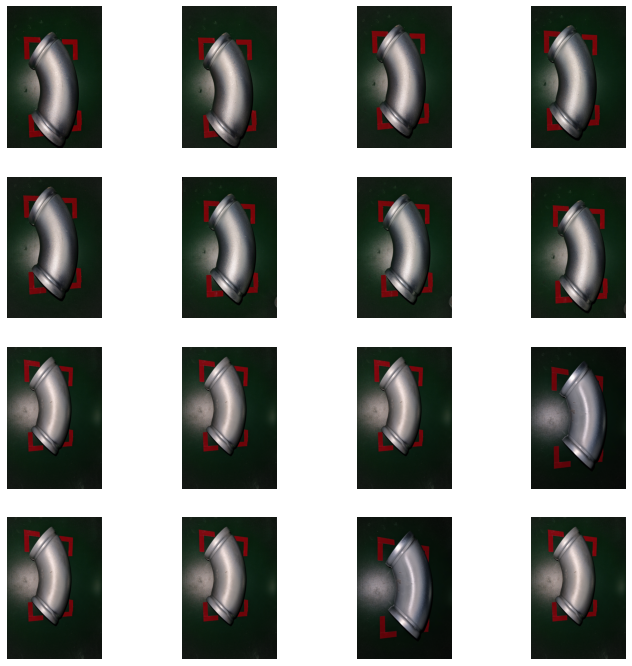

In [ ]:
# 이미지 확인

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_G_pix = [os.path.join(train_G_dir, fname) for fname in train_G_fnames[pic_index-8:pic_index]]
next_B_pix = [os.path.join(train_B_dir, fname) for fname in train_B_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_G_pix+next_B_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [ ]:
# train 이미지 불러오기
next_G_pix = [os.path.join(train_G_dir, fname) for fname in train_G_fnames]
next_B_pix = [os.path.join(train_B_dir, fname) for fname in train_B_fnames]

## 이미지 데이터 증강

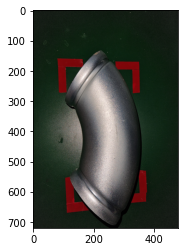

In [ ]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_G_pix[0])
sample_img = cv2.cvtColor(cv2.imread(next_G_pix[0]), cv2.COLOR_BGR2RGB).copy()
plt.imshow(sample_img)
plt.show()

In [ ]:
# test 이미지 불러오기

test_G_img = [os.path.join(test_G_dir, fname) for fname in test_G_fnames]
test_B_img = [os.path.join(test_B_dir, fname) for fname in test_B_fnames]
print(test_G_img[0])
print(test_B_img[0])

/content/drive/MyDrive/6dogma_sy/res/resized_aug/test/Good/KEMP_IMG_DATA_10.png
/content/drive/MyDrive/6dogma_sy/res/resized_aug/test/bad/Error_test_(2).png


In [ ]:
# 이미지 증강 관련 함수-Good

def show_images(images, labels):
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
    for i in range(5):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])
        
img_all = []
# 원본 이미지를 입력받아 augmentation 적용하여 시각화
def aug_apply(image, label, aug):

    image_list = [image]
    label_list = ['origin']

    for i in range(5):
      aug_image = aug(image=image)['image']

      # img_temp_name.append("./test{}.png".format(i))
      im = Image.fromarray(aug_image)
      # im.save("./test{}.png".format(i))

      if i > 0 :
        img_all.append(im)
      
      image_list.append(aug_image)
      label_list.append(label)

    # show_images(image_list, label_list)

# def saveImage() :
#   for i in range(0, len(img_all)):
#     img_all[i].save("/content/drive/MyDrive/6dogma_sy/res/retrain_albu/Good/train_Good{}.png".format(i))
#   # img_all.clear()
#   print("Image Save OK ....") 

def saveImage(IMG_CNT) :
  cnt = IMG_CNT
  for i in range(0, len(img_all)):
    img_all[i].save("/content/drive/MyDrive/6dogma_sy/res/test_RGBA2/Good/test_Good{}.png".format(cnt))
    cnt += 1
  img_all.clear()
  print("Image Save OK ....") 
  return cnt


In [ ]:
# 이미지 증강 관련 함수-Bad
        
img_all = []
# 원본 이미지를 입력받아 augmentation 적용하여 시각화
def aug_apply(image, label, aug):

    image_list = [image]
    label_list = ['origin']

    for i in range(5):
      aug_image = aug(image=image)['image']

      im = Image.fromarray(aug_image)

      if i > 0 :
        img_all.append(im)
      
      image_list.append(aug_image)
      label_list.append(label)

def saveImage(IMG_CNT) :
  cnt = IMG_CNT
  for i in range(0, len(img_all)):
    img_all[i].save("/content/drive/MyDrive/6dogma_sy/res/test_RGBA3/bad/test_Bad{}.png".format(cnt))
    cnt += 1
  img_all.clear()
  print("Image Save OK ....") 
  return cnt

In [ ]:
# # 좌우 반전
# aug_horizontal = A.HorizontalFlip(p=0.5)
# # 상하 반전
# aug_vertical = A.VerticalFlip(p=0.5)
# # -90 ~ 90도 사이로 돌림, 남은 공간은 주변 환경으로 채움 (cv2.BORDER_CONSTAN, cv2.BORDER_REFLECT, cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP)
# aug_rotate = A.Rotate(limit=90, p=0.5, border_mode=cv2.BORDER_REPLICATE)
# # 원본사이즈를 변경 하면서 90, 180, 270, 360도 돌림
# aug_random_rotate = A.RandomRotate90(p=1)
# # 노이즈
# aug_GaussNoise = A.GaussNoise(var_limit=(10.0, 50.0), mean=11, per_channel=True, always_apply=False, p=1)
# #ISONoise
# aug_ISONoise  = A.ISONoise ( color_shift=(0.01, 0.5), intensity=(0.5, 0.7), p=1 )
#RGBShift
aug_RGBShift  = A.RGBShift ( r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1)

# aug_apply(image=sample_img, label='Horizontal', aug=aug_horizontal)
# aug_apply(image=sample_img, label='Vertical', aug=aug_vertical)
# aug_apply(image=sample_img, label='Rotate', aug=aug_rotate)
# aug_apply(image=sample_img, label='RandomRotate', aug=aug_random_rotate)

In [ ]:
sample_img.shape


(720, 480, 3)

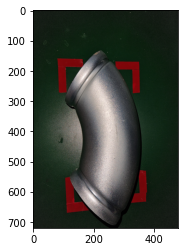

In [ ]:
# Good 이미지 하나 불러오기
sample_G_img = mpimg.imread(next_G_pix[7])
sample_G_img = cv2.cvtColor(cv2.imread(next_G_pix[0]), cv2.COLOR_BGR2RGB).copy()
plt.imshow(sample_G_img)
plt.show()

In [ ]:
# Bad 이미지 하나 불러오기
# sample_B_img = mpimg.imread(next_B_pix[0])
sample_B_img = cv2.cvtColor(cv2.imread(next_B_pix[0]), cv2.COLOR_BGR2RGB).copy()
# plt.imshow(sample_B_img)
# plt.show()
sample_B_img

array([[[19, 18, 14],
        [17, 17, 12],
        [14, 17, 13],
        ...,
        [14, 16, 14],
        [10, 12, 10],
        [ 9, 11, 12]],

       [[ 9, 11,  7],
        [17, 21, 17],
        [14, 18, 14],
        ...,
        [14, 16, 13],
        [11, 13, 11],
        [13, 15, 13]],

       [[12, 17, 12],
        [19, 25, 19],
        [13, 17, 14],
        ...,
        [16, 18, 16],
        [13, 15, 13],
        [13, 14, 12]],

       ...,

       [[12, 16, 13],
        [10, 12,  9],
        [16, 18, 15],
        ...,
        [12, 13, 12],
        [13, 13, 13],
        [ 7,  7,  7]],

       [[12, 14, 12],
        [ 8, 11,  8],
        [11, 13, 11],
        ...,
        [14, 16, 15],
        [16, 17, 16],
        [ 7,  8,  7]],

       [[14, 15, 13],
        [11, 13, 11],
        [ 6,  9,  6],
        ...,
        [ 7,  9,  8],
        [11, 13, 12],
        [10, 12, 11]]], dtype=uint8)

In [ ]:
# train-Good 이미지 Albumentation 후 저장
# 좌우 반전
aug_horizontal = A.HorizontalFlip(p=1)
# 상하 반전
aug_vertical = A.VerticalFlip(p=1)
# -90 ~ 90도 사이로 돌림, 남은 공간은 주변 환경으로 채움 (cv2.BORDER_CONSTAN, cv2.BORDER_REFLECT, cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP)
aug_rotate = A.Rotate(limit=45, p=1, border_mode=cv2.BORDER_REPLICATE)
# 원본사이즈를 변경 하면서 90, 180, 270, 360도 돌림
aug_random_rotate = A.RandomRotate90(p=1)

IMG_CNT = 0

for i in range(20,30):
  sample_G_img = cv2.cvtColor(cv2.imread(next_G_pix[i]), cv2.COLOR_BGR2RGBA).copy()
  aug_apply(image=sample_G_img, label='Horizontal', aug=aug_horizontal)
  aug_apply(image=sample_G_img, label='Vertical', aug=aug_vertical)
  aug_apply(image=sample_G_img, label='Rotate', aug=aug_rotate)
  aug_apply(image=sample_G_img, label='RandomRotate', aug=aug_random_rotate)

  IMG_CNT = saveImage(IMG_CNT)

Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....


In [ ]:
# train-bad 이미지 Albumentation 후 저장
# 좌우 반전
aug_horizontal = A.HorizontalFlip(p=1)
# 상하 반전
aug_vertical = A.VerticalFlip(p=1)
# -90 ~ 90도 사이로 돌림, 남은 공간은 주변 환경으로 채움 (cv2.BORDER_CONSTAN, cv2.BORDER_REFLECT, cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP)
aug_rotate = A.Rotate(limit=45, p=1, border_mode=cv2.BORDER_REPLICATE)
# 원본사이즈를 변경 하면서 90, 180, 270, 360도 돌림
aug_random_rotate = A.RandomRotate90(p=1)

IMG_CNT = 0

for i in range(100, 300, 20):
  sample_B_img = cv2.cvtColor(cv2.imread(next_B_pix[i]), cv2.COLOR_BGR2RGBA).copy()
  aug_apply(image=sample_B_img, label='Horizontal', aug=aug_horizontal)
  aug_apply(image=sample_B_img, label='Vertical', aug=aug_vertical)
  aug_apply(image=sample_B_img, label='Rotate', aug=aug_rotate)
  aug_apply(image=sample_B_img, label='RandomRotate', aug=aug_random_rotate)

  IMG_CNT = saveImage(IMG_CNT)

Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
Image Save OK ....
